### Install dependencies

In [3]:
!pip install rdkit torch torch-geometric


### Load Dataset

- This project uses the EGFR IC50 dataset from ChEMBL.
- Upload the CSV file when prompted in Colab.

In [ ]:
# Dataset upload
from google.colab import files
import pandas as pd

uploaded = files.upload()  # upload the EGFR IC50 CSV

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, sep=None, engine="python")



In [ ]:
print(len(df))
df.head()


25758


,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
0,CHEMBL6034481,NaN,NaN,574.71,2.0,5.70,BDBM517794,C=CC(=O)Nc1cc(Nc2ncc(C)c(-c3cc(F)c4nc(C)n(C(C)...,IC50,'=',...,CHEMBL5728717,37,BindingDB Patent Bioactivity Data,NaN,2021.0,NaN,NaN,NaN,NaN,25.0
1,CHEMBL5962799,NaN,NaN,563.70,2.0,6.05,BDBM517803,C=CC(=O)Nc1cc(Nc2nccc(-c3cc(F)c4nc(C)n(C(C)C)c...,IC50,'<',...,CHEMBL5728717,37,BindingDB Patent Bioactivity Data,NaN,2021.0,NaN,NaN,NaN,NaN,1.0
2,CHEMBL6061951,NaN,NaN,545.62,2.0,5.24,BDBM517808,C=CC(=O)Nc1cc(Nc2nccc(-c3cc(F)c4nc(C)n(C(C)C)c...,IC50,'=',...,CHEMBL5728717,37,BindingDB Patent Bioactivity Data,NaN,2021.0,NaN,NaN,NaN,NaN,25.0
3,CHEMBL1254199,NaN,NaN,408.30,0.0,4.66,4,CN(c1cccc(Br)c1)c1nc(N)nc2[nH]c(Cc3ccccc3)cc12,IC50,'=',...,CHEMBL1250424,1,Scientific Literature,Bioorg Med Chem,2010.0,CHEMBL3307523,NaN,NaN,NaN,53.1
4,CHEMBL1254286,NaN,NaN,422.33,0.0,4.67,6,CN(c1cccc(Br)c1)c1nc(N)nc2c1cc(Cc1ccccc1)n2C,IC50,'=',...,CHEMBL1250424,1,Scientific Literature,Bioorg Med Chem,2010.0,CHEMBL3307523,NaN,NaN,NaN,253.6


In [ ]:
df.shape
df.head()
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25758 entries, 0 to 25757
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Molecule ChEMBL ID          25758 non-null  object 
 1   Molecule Name               2841 non-null   object 
 2   Molecule Max Phase          2531 non-null   float64
 3   Molecular Weight            25732 non-null  float64
 4   #RO5 Violations             25447 non-null  float64
 5   AlogP                       25447 non-null  float64
 6   Compound Key                25758 non-null  object 
 7   Smiles                      25711 non-null  object 
 8   Standard Type               25758 non-null  object 
 9   Standard Relation           24366 non-null  object 
 10  Standard Value              24363 non-null  float64
 11  Standard Units              24505 non-null  object 
 12  pChEMBL Value               18650 non-null  float64
 13  Data Validity Comment       503

,0
Molecule ChEMBL ID,0
Molecule Name,22917
Molecule Max Phase,23227
Molecular Weight,26
#RO5 Violations,311
AlogP,311
Compound Key,0
Smiles,47
Standard Type,0
Standard Relation,1392


In [ ]:
df = df[['Smiles', 'Molecular Weight', 'AlogP', 'pChEMBL Value', 'Standard Value']]
df.head()


,Smiles,Molecular Weight,AlogP,pChEMBL Value,Standard Value
0,C=CC(=O)Nc1cc(Nc2ncc(C)c(-c3cc(F)c4nc(C)n(C(C)...,574.71,5.70,7.60,25.0
1,C=CC(=O)Nc1cc(Nc2nccc(-c3cc(F)c4nc(C)n(C(C)C)c...,563.70,6.05,NaN,1.0
2,C=CC(=O)Nc1cc(Nc2nccc(-c3cc(F)c4nc(C)n(C(C)C)c...,545.62,5.24,7.60,25.0
3,CN(c1cccc(Br)c1)c1nc(N)nc2[nH]c(Cc3ccccc3)cc12,408.30,4.66,4.28,53100.0
4,CN(c1cccc(Br)c1)c1nc(N)nc2c1cc(Cc1ccccc1)n2C,422.33,4.67,NaN,253600.0


In [ ]:
df = df.dropna(subset=['Smiles'])
len(df)


25711

In [ ]:
df['Smiles'].head(10)


,Smiles
0,C=CC(=O)Nc1cc(Nc2ncc(C)c(-c3cc(F)c4nc(C)n(C(C)...
1,C=CC(=O)Nc1cc(Nc2nccc(-c3cc(F)c4nc(C)n(C(C)C)c...
2,C=CC(=O)Nc1cc(Nc2nccc(-c3cc(F)c4nc(C)n(C(C)C)c...
3,CN(c1cccc(Br)c1)c1nc(N)nc2[nH]c(Cc3ccccc3)cc12
4,CN(c1cccc(Br)c1)c1nc(N)nc2c1cc(Cc1ccccc1)n2C
5,C=CC(=O)Nc1cccc(Nc2nc(Nc3ccc(N4CC5CCC(C4)N5C(C...
6,COc1cc(-c2nn(C(C)C)c3ncnc(N)c23)ccc1F
7,CC(C)n1nc(-c2ccc(F)c(O)c2)c2c(N)ncnc21
8,C[C@@H](CN(C)C(=O)CO)Oc1cccc2ncnc(Nc3ccc(OCc4c...
9,COCCOc1cc2ncc(C#N)c(N[C@@H]3C[C@H]3c3ccccc3)c2...


In [ ]:
df = df.drop_duplicates(subset='Smiles')
print("After removing duplicates:", len(df))


After removing duplicates: 14438


Sanitize data

In [ ]:
from rdkit import Chem

def to_mol(s):
    try:
        return Chem.MolFromSmiles(s)
    except:
        return None

df['mol'] = df['Smiles'].apply(to_mol)
df = df[df['mol'].notnull()]
print("valid mols:", len(df))


valid mols: 14438


In [ ]:
from rdkit.Chem.rdmolops import GetMolFrags

def largest_fragment(m):
    frags = Chem.GetMolFrags(m, asMols=True)
    frags = sorted(frags, key=lambda x: x.GetNumAtoms(), reverse=True)
    return frags[0]

df['mol'] = df['mol'].apply(largest_fragment)
df['Smiles'] = df['mol'].apply(Chem.MolToSmiles)
df = df.drop_duplicates(subset='Smiles')
print("after fragment cleanup:", len(df))


after fragment cleanup: 14380


In [ ]:
from rdkit.Chem import Descriptors

def drug_like(m):
    mw = Descriptors.MolWt(m)
    return (150 < mw < 750)

df = df[df['mol'].apply(drug_like)]
print("after filtering:", len(df))


after filtering: 13976


In [ ]:
from rdkit import Chem

max_nodes = 0
for smi in df['Smiles']:
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        num_atoms = mol.GetNumAtoms()
        if num_atoms > max_nodes:
            max_nodes = num_atoms

print("Maximum number of nodes (atoms) in dataset:", max_nodes)


Maximum number of nodes (atoms) in dataset: 55


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
import pandas as pd


## Graph Construction

In [8]:
from rdkit import Chem

ATOM_LIST = ["C","N","O","F","P","S","Cl","Br","I"]
MAX_NODES = 55

def mol_to_graph_discrete(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    N = mol.GetNumAtoms()

    # Node features (one-hot)
    x = []
    for atom in mol.GetAtoms():
        feat = [int(atom.GetSymbol() == a) for a in ATOM_LIST]
        x.append(feat)
    x = torch.tensor(x, dtype=torch.float)

    # Edge index and bond features
    edge_index = []
    edge_attr = []
    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()
        j = bond.GetEndAtomIdx()
        edge_index.append([i, j])
        edge_index.append([j, i])
        # simple bond type one-hot: single, double, triple, aromatic
        bt = [0,0,0,0]
        btype = bond.GetBondType()
        if btype == Chem.rdchem.BondType.SINGLE: bt[0]=1
        elif btype == Chem.rdchem.BondType.DOUBLE: bt[1]=1
        elif btype == Chem.rdchem.BondType.TRIPLE: bt[2]=1
        elif btype == Chem.rdchem.BondType.AROMATIC: bt[3]=1
        edge_attr.append(bt)
        edge_attr.append(bt)
    if edge_index:
        edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
        edge_attr = torch.tensor(edge_attr, dtype=torch.float)
    else:
        edge_index = torch.empty((2,0), dtype=torch.long)
        edge_attr = torch.empty((0,4), dtype=torch.float)

    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, num_nodes=N)


In [ ]:
graphs = [mol_to_graph_discrete(s) for s in df['Smiles'] if mol_to_graph_discrete(s) is not None]


## Dataset splitting

In [ ]:
from torch.utils.data import Dataset

class MoleculeDataset(Dataset):
    def __init__(self, graphs):
        self.graphs = graphs

    def __len__(self):
        return len(self.graphs)

    def __getitem__(self, idx):
        return self.graphs[idx]

# Split
train_size = int(0.9 * len(graphs))
train_dataset = MoleculeDataset(graphs[:train_size])
test_dataset = MoleculeDataset(graphs[train_size:])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)


## Graph VAE model

In [9]:
class GraphVAE(nn.Module):
    def __init__(self, max_nodes=MAX_NODES, node_feat_dim=9, bond_feat_dim=4, hidden_dim=64, latent_dim=32):
        super(GraphVAE, self).__init__()
        self.max_nodes = max_nodes
        self.node_feat_dim = node_feat_dim
        self.bond_feat_dim = bond_feat_dim
        self.latent_dim = latent_dim
        self.hidden_dim = hidden_dim
        # Encoder
        self.conv1 = GCNConv(node_feat_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)

        # Decoder
        self.fc_decode = nn.Linear(latent_dim, hidden_dim)
        self.node_out = nn.Linear(hidden_dim, max_nodes*node_feat_dim)
        self.edge_out = nn.Linear(hidden_dim, max_nodes*max_nodes*bond_feat_dim)

    def encode(self, x, edge_index, batch):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = global_mean_pool(x, batch)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = F.relu(self.fc_decode(z))
        node_feats = self.node_out(h)
        node_feats = node_feats.view(-1, self.max_nodes, self.node_feat_dim)
        edge_feats = self.edge_out(h)
        edge_feats = edge_feats.view(-1, self.max_nodes, self.max_nodes, self.bond_feat_dim)
        return node_feats, edge_feats

    def forward(self, data):
        if not hasattr(data, 'batch'):
            data.batch = torch.zeros(data.x.size(0), dtype=torch.long, device=data.x.device)

        mu, logvar = self.encode(data.x, data.edge_index, data.batch)
        z = self.reparameterize(mu, logvar)
        x_hat, bond_hat = self.decode(z)
        return x_hat, bond_hat, mu, logvar


## Training - Node Loss

In [ ]:
from torch_geometric.nn import global_mean_pool

def gvaenode_loss(x_hat, data, mu, logvar, beta=0.001):


    batch_size = mu.size(0)
    device = mu.device

    # predicted node distribution
    pred_node_dist = x_hat.softmax(dim=-1).mean(dim=1)

    # real node distribution
    real_atom_onehot = data.x  # [num_nodes, 9]
    real_node_dist = global_mean_pool(real_atom_onehot, data.batch)  # [B, 9]

    # node loss
    node_loss = F.mse_loss(pred_node_dist, real_node_dist)

    # kl divergence
    kl_loss = -0.5 * torch.mean(
        1 + logvar - mu.pow(2) - logvar.exp()
    )

    return node_loss + beta * kl_loss


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GraphVAE(max_nodes=MAX_NODES).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


for epoch in range(50):
    model.train()
    total_loss = 0.0
    mu_sum = 0.0
    logvar_sum = 0.0
    n_batches = 0

    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()

        x_hat, bond_hat, mu, logvar = model(data)
        loss = gvaenode_loss(x_hat, data, mu, logvar)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        mu_sum += mu.mean().item()
        logvar_sum += logvar.mean().item()
        n_batches += 1

    print(
        f"Epoch {epoch+1}, "
        f"Loss: {total_loss / n_batches:.4f}, "
        f"mu_mean: {mu_sum / n_batches:.4f}, "
        f"logvar_mean: {logvar_sum / n_batches:.4f}"
    )

Epoch 1, Loss: 0.0051, mu_mean: 0.0821, logvar_mean: 0.2706
Epoch 2, Loss: 0.0014, mu_mean: 0.0944, logvar_mean: -0.1796
Epoch 3, Loss: 0.0011, mu_mean: 0.0816, logvar_mean: -0.2667
Epoch 4, Loss: 0.0007, mu_mean: 0.0670, logvar_mean: -0.3472
Epoch 5, Loss: 0.0006, mu_mean: 0.0432, logvar_mean: -0.3270
Epoch 6, Loss: 0.0005, mu_mean: 0.0260, logvar_mean: -0.3017
Epoch 7, Loss: 0.0005, mu_mean: 0.0286, logvar_mean: -0.2797
Epoch 8, Loss: 0.0004, mu_mean: 0.0283, logvar_mean: -0.2503
Epoch 9, Loss: 0.0004, mu_mean: 0.0231, logvar_mean: -0.2437
Epoch 10, Loss: 0.0004, mu_mean: 0.0198, logvar_mean: -0.2366
Epoch 11, Loss: 0.0004, mu_mean: 0.0156, logvar_mean: -0.2378
Epoch 12, Loss: 0.0004, mu_mean: 0.0123, logvar_mean: -0.2378
Epoch 13, Loss: 0.0004, mu_mean: 0.0115, logvar_mean: -0.2549
Epoch 14, Loss: 0.0004, mu_mean: 0.0080, logvar_mean: -0.2718
Epoch 15, Loss: 0.0004, mu_mean: 0.0062, logvar_mean: -0.2681
Epoch 16, Loss: 0.0003, mu_mean: 0.0039, logvar_mean: -0.2678
Epoch 17, Loss: 0.

### Check atoms

In [ ]:
model.eval()
latent_dim = 32
z = torch.randn(1, latent_dim).to(device)
x_hat, _ = model.decode(z)
probs = x_hat.softmax(dim=-1)

print(probs[0][:5])


tensor([[9.9318e-01, 1.8680e-03, 4.8845e-03, 3.3824e-06, 1.5232e-06, 3.4356e-05,
         2.2023e-05, 2.9673e-06, 5.2237e-07],
        [1.0000e+00, 7.1326e-07, 1.0027e-06, 1.2601e-07, 1.8587e-07, 5.4310e-07,
         9.1332e-07, 1.1240e-07, 1.1095e-07],
        [1.0000e+00, 3.4375e-07, 2.1083e-07, 2.3140e-07, 2.7881e-07, 1.6941e-07,
         2.3890e-07, 2.7448e-07, 8.3421e-08],
        [1.0000e+00, 4.1848e-07, 9.9447e-08, 1.6732e-07, 3.7405e-07, 2.4292e-07,
         1.1756e-06, 7.7825e-07, 1.9385e-07],
        [8.9594e-01, 7.6730e-03, 9.4917e-02, 1.5371e-04, 4.6242e-06, 2.1686e-04,
         3.3561e-04, 7.5408e-04, 9.6579e-06]], grad_fn=<SliceBackward0>)


Freeze node parameters for better training of edges



In [ ]:
for param in model.node_out.parameters():
    param.requires_grad = False


In [ ]:
for name, param in model.named_parameters():
    if "node_out" in name:
        print(name, param.requires_grad)


node_out.weight False
node_out.bias False


## Training - Edge Loss

In [ ]:
def build_dense_edge_target(data, max_nodes, bond_dim):

    batch_size = data.batch.max().item() + 1
    device = data.x.device

    edge_target = torch.zeros(
        batch_size, max_nodes, max_nodes, bond_dim, device=device
    )
    edge_mask = torch.zeros(
        batch_size, max_nodes, max_nodes, device=device
    )

    for i in range(batch_size):
        node_offset = (data.batch == i).nonzero(as_tuple=False).view(-1)
        n = node_offset.size(0)

        edge_mask[i, :n, :n] = 1  # valid node pairs

    # fill bonds
    for idx, (u, v) in enumerate(data.edge_index.t()):
        b = data.batch[u]
        local_u = (data.batch[:u+1] == b).sum() - 1
        local_v = (data.batch[:v+1] == b).sum() - 1
        edge_target[b, local_u, local_v] = data.edge_attr[idx]

    return edge_target, edge_mask


In [ ]:
def edge_loss(bond_hat, data, max_nodes, bond_dim):

    edge_target, edge_mask = build_dense_edge_target(
        data, max_nodes, bond_dim
    )

    # Flatten
    pred = bond_hat.view(-1, bond_dim)
    target = edge_target.view(-1, bond_dim)
    mask = edge_mask.view(-1)

    # Convert one-hot target to class index
    target_cls = target.argmax(dim=-1)

    # Cross-entropy only on valid edges
    loss = F.cross_entropy(
        pred[mask == 1],
        target_cls[mask == 1]
    )

    return loss


In [ ]:
def g_vae_loss(x_hat, bond_hat, data, mu, logvar,
                   beta=0.01):
    # KL
    kl = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())

    # Edge loss
    e_loss = edge_loss(
        bond_hat, data,
        max_nodes=MAX_NODES,
        bond_dim=4
    )

    return e_loss + beta * kl


In [ ]:
optimizer = torch.optim.Adam(
    filter(lambda p: p.requires_grad, model.parameters()), lr=1e-3
)

for epoch in range(20):
    model.train()
    total_loss = 0

    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()

        x_hat, bond_hat, mu, logvar = model(data)
        loss = g_vae_loss(x_hat, bond_hat, data, mu, logvar)

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Edge Loss: {total_loss/len(train_loader):.4f}")


Epoch 1, Edge Loss: 0.1052
Epoch 2, Edge Loss: 0.1044
Epoch 3, Edge Loss: 0.1040
Epoch 4, Edge Loss: 0.1037
Epoch 5, Edge Loss: 0.1033
Epoch 6, Edge Loss: 0.1032
Epoch 7, Edge Loss: 0.1029
Epoch 8, Edge Loss: 0.1025
Epoch 9, Edge Loss: 0.1023
Epoch 10, Edge Loss: 0.1021
Epoch 11, Edge Loss: 0.1018
Epoch 12, Edge Loss: 0.1015
Epoch 13, Edge Loss: 0.1015
Epoch 14, Edge Loss: 0.1012
Epoch 15, Edge Loss: 0.1010
Epoch 16, Edge Loss: 0.1009
Epoch 17, Edge Loss: 0.1008
Epoch 18, Edge Loss: 0.1005
Epoch 19, Edge Loss: 0.1004
Epoch 20, Edge Loss: 0.1003


### Check atoms

In [ ]:
model.eval()
latent_dim = 32
z = torch.randn(1, latent_dim).to(device)
x_hat, bond_hat = model.decode(z)

# Node probabilities
node_probs = x_hat.softmax(dim=-1)
print("Node probs (first 5 nodes):")
print(node_probs[0][:5])

# Edge probabilities
edge_probs = bond_hat.softmax(dim=-1)  # softmax over bond types (last dim)
print("Edge probs (first 5 nodes, first 5 nodes):")
print(edge_probs[0][:5, :5])


Node probs (first 5 nodes):
tensor([[3.0277e-01, 1.6655e-02, 5.1205e-01, 1.1622e-02, 2.4017e-04, 1.0517e-01,
         5.1129e-02, 2.4401e-04, 1.3225e-04],
        [9.9958e-01, 5.4652e-05, 3.1521e-05, 1.6909e-05, 3.7518e-05, 6.3923e-05,
         1.6546e-04, 2.3388e-05, 2.8556e-05],
        [9.9971e-01, 2.5129e-05, 5.1836e-05, 2.2489e-05, 3.3494e-05, 3.2041e-05,
         2.2462e-05, 7.5429e-05, 2.6389e-05],
        [9.9976e-01, 4.2804e-05, 1.4423e-05, 2.1239e-05, 1.7488e-05, 3.6678e-05,
         2.2008e-05, 4.8472e-05, 3.4889e-05],
        [1.6698e-01, 8.3284e-03, 2.1145e-01, 4.2683e-02, 3.7859e-04, 4.8744e-01,
         7.7976e-02, 4.3909e-03, 3.7822e-04]], grad_fn=<SliceBackward0>)
Edge probs (first 5 nodes, first 5 nodes):
tensor([[[1.0000e+00, 3.2046e-08, 3.7508e-08, 2.2712e-08],
         [5.7806e-01, 4.0606e-01, 1.5875e-02, 1.4862e-06],
         [1.0000e+00, 2.1366e-08, 2.9901e-08, 2.8007e-08],
         [1.0000e+00, 3.1000e-08, 3.2734e-08, 3.8078e-08],
         [1.0000e+00, 3.3115e-0

## Molecule Generation

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem


MAX_VALENCE = {
    'C': 4,
    'N': 3,
    'O': 2,
    'F': 1,
    'P': 5,
    'S': 6,
    'Cl': 1,
    'Br': 1,
    'I': 1
}

def decode_to_mol(x_hat, edge_hat, threshold=0.5):

    x_probs = x_hat.softmax(dim=-1)
    edge_probs = edge_hat.softmax(dim=-1)

    mol = Chem.RWMol()
    atom_indices = []

    # Add atoms
    for i, atom_prob in enumerate(x_probs):
        atom_type_idx = atom_prob.argmax().item()
        atom_symbol = ATOM_LIST[atom_type_idx]
        if atom_symbol == 'PAD':
            continue
        atom_idx = mol.AddAtom(Chem.Atom(atom_symbol))
        atom_indices.append((atom_idx, atom_symbol))

    # Track current valence
    valence_count = {idx: 0 for idx, _ in atom_indices}

    # Add bonds
    num_atoms = len(atom_indices)
    for i in range(num_atoms):
        idx_i, sym_i = atom_indices[i]
        for j in range(i+1, num_atoms):
            idx_j, sym_j = atom_indices[j]

            bond_prob = edge_probs[i, j]
            bond_type_idx = bond_prob.argmax().item()

            # Skip if below threshold or bond_type_idx == 0 (no bond)
            if bond_type_idx == 0 or bond_prob[bond_type_idx] < threshold:
                continue

            # Map bond_type_idx to RDKit bond type
            if bond_type_idx == 1:
                btype = Chem.rdchem.BondType.SINGLE
                bval = 1
            elif bond_type_idx == 2:
                btype = Chem.rdchem.BondType.DOUBLE
                bval = 2
            elif bond_type_idx == 3:
                btype = Chem.rdchem.BondType.TRIPLE
                bval = 3
            else:
                continue

            # Check valence
            if valence_count[idx_i] + bval > MAX_VALENCE[sym_i]:
                continue
            if valence_count[idx_j] + bval > MAX_VALENCE[sym_j]:
                continue

            # Add bond
            mol.AddBond(idx_i, idx_j, btype)
            valence_count[idx_i] += bval
            valence_count[idx_j] += bval

    # Sanitize molecule
    try:
        Chem.SanitizeMol(mol)
        return mol
    except:
        return None


In [ ]:
model.eval()
latent_dim = 32
z = torch.randn(5, latent_dim).to(device)
x_hat, edge_hat = model.decode(z)

molecules = []
for i in range(z.size(0)):
    mol = decode_to_mol(x_hat[i], edge_hat[i], threshold=0.5)
    if mol is not None:
        molecules.append(mol)

print(f"Generated {len(molecules)}/{z.size(0)} valid molecules")
for m in molecules:
    print(Chem.MolToSmiles(m))


Generated 5/5 valid molecules
C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C#C.C#C.C#C.C#C.C#C.C#C.C#C.C#C.C#N.C#N.Cl.Cl.Cl.N.N.N.O
C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C#C.C#C.C#C.C#C.C#C.C#C.C#C.C#C.C#C.C#C.C#N.C#N.CC.CC.N.O.O
C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C#C.C#C.C#C.C#C.C#C.C#C.C#C.C#C.C#C.C#C.C#N.C#N.N.N.N.N.N.N.N#N.N#N.O.O.O
C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C#C.C#C.C#C.C#C.C#C.C#C.C#C.C#C.C#C.C#C.C#C.C#C.C#N.C#N.C#N.C#N.C#N.C#N.N.N.N#N
Br.Br.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C.C#C.C#C.C#C.C#C.C#C.C#C.C#C.C#C.C#C.C#C.C#C.C#N.C#N.Cl.F.N.N.N.N#N.S.S


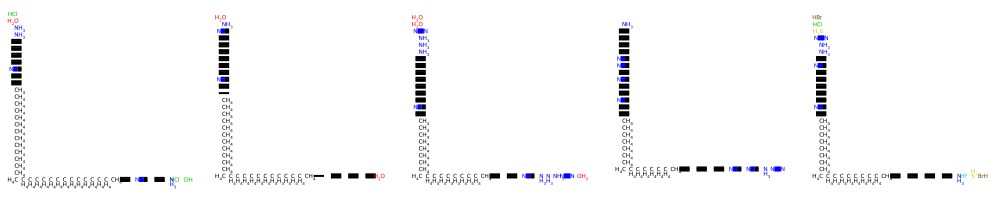

In [ ]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(molecules, molsPerRow=5)


### Evaluation

In [ ]:
from rdkit.Chem import Descriptors
from rdkit.Chem import QED
for mol in molecules:
    print(Descriptors.MolWt(mol), Descriptors.MolLogP(mol), QED.qed(mol))


890.051 21.01226000000001 0.2040763550237398
812.6650000000002 18.604959999999988 0.24294060263610684
815.465 12.781579999999986 0.09808954668602098
777.333 13.727139999999979 0.17341173827383197
994.8079999999999 16.94461999999998 0.15823963950882944


## Save the model

In [13]:
torch.save(model.state_dict(), "graph_vae_egfr.pt")


In [15]:
import pickle

config = {
    "latent_dim": 32,
    "max_nodes": MAX_NODES,
    "num_node_types": 9,
    "num_edge_types": 4,
    "dataset": "ChEMBL EGFR IC50",
    "model": "GraphVAE (node + edge decoder)",
}

with open("config.pkl", "wb") as f:
    pickle.dump(config, f)


In [16]:
atom_types = ["C", "N", "O", "F", "Cl", "Br", "S", "P", "I"]
bond_types = ["NONE", "SINGLE", "DOUBLE", "TRIPLE"]

with open("vocab.pkl", "wb") as f:
    pickle.dump({
        "atom_types": atom_types,
        "bond_types": bond_types
    }, f)
